In [169]:
#Description: The purpose of this report is to build a sentiment anlaysis for three specific stocks, SPY, JNJ & TSLA

In [170]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import numpy as np
import re
from textblob import TextBlob
import textblob
import tweepy
import sys
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt4
from alpaca_trade_api.rest import REST
%matplotlib inline

In [171]:
load_dotenv()

True

In [172]:
consumer_key = os.getenv("consumer_key")
consumer_secret = os.getenv("consumer_secret")
Access_Token = os.getenv("Access_Token")
Access_Token_Secret = os.getenv("Access_Token_Secret")

In [173]:
auth_handler = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth_handler.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth_handler, wait_on_rate_limit=True)


In [174]:
tsla_serch_term = '#TSLA -filter:retweets'

In [175]:
tweet_amount = 1000


In [176]:
tsla_tweets = tweepy.Cursor(api.search, q=tsla_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)


In [177]:
tsla_all_tweets = [tweet.full_text for tweet in tsla_tweets]


In [178]:
#this Data Frame is used to create the set needed to
tsla_tweets_df = pd.DataFrame(tsla_all_tweets, columns=['Tweets'])


In [179]:
#this formula is used to clean up the tweets; S+ means “a string of non-whitespace characters"

for _, row in tsla_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])



In [180]:
tsla_tweets_df['Polarity'] = tsla_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)


In [181]:
tsla_tweets_df['Result'] = tsla_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [182]:
positive = tsla_tweets_df[tsla_tweets_df.Result == '+'].count()['Tweets']
negative = tsla_tweets_df[tsla_tweets_df.Result == '-'].count()['Tweets']

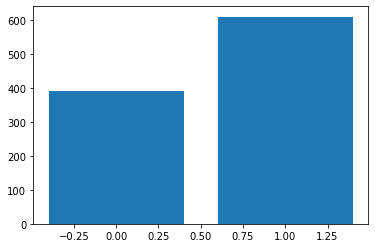

In [183]:
plt.bar([0,1], [positive, negative])

plt.show()


In [184]:
jnj_serch_term = '#JNJ -filter:retweets'

In [185]:
jnj_tweets = tweepy.Cursor(api.search, q=jnj_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [186]:
jnj_all_tweets = [tweet.full_text for tweet in jnj_tweets]


In [187]:
jnj_tweets_df = pd.DataFrame(jnj_all_tweets, columns=['Tweets'])

In [188]:
for _, row in jnj_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [189]:
jnj_tweets_df['Polarity'] = jnj_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [190]:
jnj_tweets_df['Result'] = jnj_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

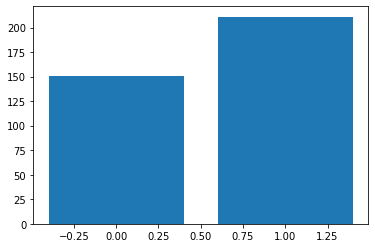

In [191]:
positive = jnj_tweets_df[jnj_tweets_df.Result == '+'].count()['Tweets']
negative = jnj_tweets_df[jnj_tweets_df.Result == '-'].count()['Tweets']
plt.bar([0,1], [positive, negative])

plt.show()


In [192]:
spy_serch_term = '#SPY -filter:retweets'

In [193]:
spy_tweets = tweepy.Cursor(api.search, q=spy_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [194]:
spy_all_tweets = [tweet.full_text for tweet in spy_tweets]

In [195]:
spy_tweets_df = pd.DataFrame(spy_all_tweets, columns=['Tweets'])

In [196]:
for _, row in spy_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [197]:
spy_tweets_df['Polarity'] = spy_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [198]:
spy_tweets_df['Result'] = spy_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

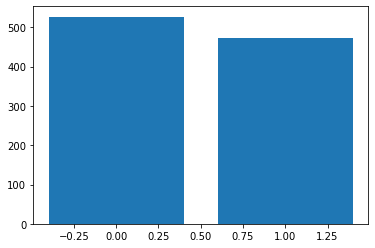

In [199]:
positive = spy_tweets_df[spy_tweets_df.Result == '+'].count()['Tweets']
negative = spy_tweets_df[spy_tweets_df.Result == '-'].count()['Tweets']
plt.bar([0,1], [positive, negative])

plt.show()

In [200]:
symbols = ["JNJ", "TSLA", "SPY"]
for symbol in symbols:
    url = f"https://api.stocktwits.com/api/2/streams/symbol/{symbol}.json"
    response = requests.get(url).json()
    print(f"THIS IS FOR {symbol}")
    print("====================")
    for item in response['messages']: 
        print(item['body'])
    print("====================")

THIS IS FOR JNJ
$IBM $INTC $JNJ $KO $JPM 

MARKETS ALERTS! SOS SOS SOS SOS

Massive Epic Short Squeeze of the Year is happening with SOS

PRE-MARKETS - we are squeezing from $3 --&gt; $77, should hit $5 tomorrow!

Buy SOS shares NOW, it will 21X ... much faster than the Dow30s (which is dying) 

go SOS, buy now! Apes and Retards!
Attack the greedy hedges and dirty shorts!
AMC Movie Part II - SOS story
$HNST I spend 130 bucks on a fuckin bot of their value sized wipes and value size diapers definitely putting 5 grand into here I have most definitely used more than that to catch my toddlers shit lol...if you are a parent this is a must fuck $JNJ
$JNJ $NVS $ABBV $MRK $LLY  
 
https://youtu.be/rqyxKlSIMyo 
, , ,
Ouch! Did You Get Your Jab?

&quot;VACCINES could cause &#39;mass male infertility&#39;, Anthony Fauci is a “dead man walking” and the inquest into the pandemic will leave &#39;blood in the gutter&#39; with reputations torn to shreds for their sheer &#39;idiocy&#39;.&quot;
$PFE $MR

In [201]:
tsla_url = "https://api.stocktwits.com/api/2/streams/symbol/TSLA.json"
tsla_data = requests.get(tsla_url).json()

In [202]:
print(json.dumps(tsla_data, indent=4))

{
    "response": {
        "status": 200
    },
    "symbol": {
        "id": 8660,
        "symbol": "TSLA",
        "title": "Tesla, Inc.",
        "aliases": [],
        "is_following": false,
        "watchlist_count": 686077
    },
    "cursor": {
        "more": true,
        "since": 340697088,
        "max": 340688009
    },
    "messages": [
        {
            "id": 340697088,
            "body": "$TSLA \n\nTesla has removed the red brake calipers on the Plaid Model S and Plaid Model X! \n\n\ud83d\ude4f\ud83c\udffb\ud83d\udc09\ud83e\udd85\ud83e\udd14",
            "created_at": "2021-06-08T04:16:05Z",
            "user": {
                "id": 1824468,
                "username": "BigNews",
                "name": "Jim",
                "avatar_url": "https://avatars.stocktwits.com/production/1824468/thumb-1548439593.png",
                "avatar_url_ssl": "https://avatars.stocktwits.com/production/1824468/thumb-1548439593.png",
                "join_date": "2019-01-25",


In [203]:
capture = []

In [204]:
for d in tsla_data['messages']:
    capture.append(d['user']['like_count'])

In [205]:
tsla_likes =pd.DataFrame(capture).rename(columns ={0: 'Likes'})

In [206]:
tsla_df = pd.DataFrame(tsla_data['messages'])
tsla_df.head(10)

,id,body,created_at,user,source,symbols,mentioned_users,entities,links,likes,conversation,reshares
0,340697088,$TSLA \n\nTesla has removed the red brake cali...,2021-06-08T04:16:05Z,"{'id': 1824468, 'username': 'BigNews', 'name':...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN,NaN,NaN
1,340697087,$TSLA Tesla Veteran Jerome Guillen Departs 3 M...,2021-06-08T04:16:04Z,"{'id': 2762379, 'username': 'Newsfilter', 'nam...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': None},[{'title': 'Tesla Veteran Jerome Guillen Depar...,NaN,NaN,NaN
2,340696363,$TSLA first btc crashing so will tesla thursd...,2021-06-08T04:12:34Z,"{'id': 2039402, 'username': 'scalpin_everyday'...","{'id': 2095, 'title': 'StockTwits For Android ...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bearish'}},NaN,"{'total': 2, 'user_ids': [3866079, 784831]}",NaN,NaN
3,340696352,SweepCast alerted: $TSLA with Unusual Options ...,2021-06-08T04:12:31Z,"{'id': 3434084, 'username': 'SweepCast', 'name...","{'id': 5407, 'title': 'OneUp App', 'url': 'htt...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'chart': {'thumb': 'https://charts.stocktwits...,"[{'title': 'Unusual Options Activity', 'url': ...",NaN,NaN,NaN
4,340696334,$TSLA $700+ this month,2021-06-08T04:12:26Z,"{'id': 1502273, 'username': 'LI_Money', 'name'...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': None},NaN,"{'total': 5, 'user_ids': [3288505, 1654596, 39...","{'parent_message_id': 340696334, 'in_reply_to_...",NaN
5,340695274,$AAPL This new Apple Map is so fire. Im planni...,2021-06-08T04:07:20Z,"{'id': 4651384, 'username': 'ButterFingerDROPs...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 686, 'symbol': 'AAPL', 'title': 'Apple...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,"{'total': 4, 'user_ids': [1035384, 3903743, 44...","{'parent_message_id': 340695274, 'in_reply_to_...",NaN
6,340695138,$LOTZ what a day! $CVNA $TSLA $VRM $VWAGY,2021-06-08T04:06:42Z,"{'id': 3328532, 'username': 'Turn_Key_Tyler', ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN,NaN,NaN
7,340694826,$BTC.X BREAKING : Michael Burry adds his $TSLA...,2021-06-08T04:05:03Z,"{'id': 5477729, 'username': 'AlwaySoBullish', ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bearish'}},NaN,"{'total': 6, 'user_ids': [4677883, 4441592, 32...","{'parent_message_id': 340694826, 'in_reply_to_...",NaN
8,340694808,#SpaceX $TSLA i just got off the the phone wit...,2021-06-08T04:04:58Z,"{'id': 3892866, 'username': 'CocoF', 'name': '...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],"{'giphy': {'id': 'OxrQAuM5kKMKHn14ls', 'ratio'...",NaN,"{'total': 1, 'user_ids': [1745995]}",NaN,NaN
9,340694728,$FCEL only now in this ST universe is a $700 m...,2021-06-08T04:04:33Z,"{'id': 834176, 'username': 'xile737', 'name': ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 1842, 'symbol': 'FCEL', 'title': 'Fuel...",[],{'sentiment': None},NaN,NaN,NaN,NaN


In [207]:
tsla_result = pd.concat([tsla_df, tsla_likes], axis = 1, join = 'outer').reset_index()


In [208]:
#formula worked, however Frank reran by mistake, which caused the error

tsla_result.drop(['created_at','source','conversation','mentioned_users','links','likes'], axis=1, inplace=True)

In [209]:
tsla_result

,index,id,body,user,symbols,entities,reshares,Likes
0,0,340697088,$TSLA \n\nTesla has removed the red brake cali...,"{'id': 1824468, 'username': 'BigNews', 'name':...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bullish'}},NaN,8223
1,1,340697087,$TSLA Tesla Veteran Jerome Guillen Departs 3 M...,"{'id': 2762379, 'username': 'Newsfilter', 'nam...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': None},NaN,536
2,2,340696363,$TSLA first btc crashing so will tesla thursd...,"{'id': 2039402, 'username': 'scalpin_everyday'...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bearish'}},NaN,11767
3,3,340696352,SweepCast alerted: $TSLA with Unusual Options ...,"{'id': 3434084, 'username': 'SweepCast', 'name...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'chart': {'thumb': 'https://charts.stocktwits...,NaN,166
4,4,340696334,$TSLA $700+ this month,"{'id': 1502273, 'username': 'LI_Money', 'name'...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': None},NaN,1227
5,5,340695274,$AAPL This new Apple Map is so fire. Im planni...,"{'id': 4651384, 'username': 'ButterFingerDROPs...","[{'id': 686, 'symbol': 'AAPL', 'title': 'Apple...",{'chart': {'thumb': 'https://charts.stocktwits...,NaN,201
6,6,340695138,$LOTZ what a day! $CVNA $TSLA $VRM $VWAGY,"{'id': 3328532, 'username': 'Turn_Key_Tyler', ...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bullish'}},NaN,31
7,7,340694826,$BTC.X BREAKING : Michael Burry adds his $TSLA...,"{'id': 5477729, 'username': 'AlwaySoBullish', ...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bearish'}},NaN,808
8,8,340694808,#SpaceX $TSLA i just got off the the phone wit...,"{'id': 3892866, 'username': 'CocoF', 'name': '...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...","{'giphy': {'id': 'OxrQAuM5kKMKHn14ls', 'ratio'...",NaN,4124
9,9,340694728,$FCEL only now in this ST universe is a $700 m...,"{'id': 834176, 'username': 'xile737', 'name': ...","[{'id': 1842, 'symbol': 'FCEL', 'title': 'Fuel...",{'sentiment': None},NaN,23710


In [210]:
tsla_df['entities'].dtypes

dtype('O')

In [211]:
counters = []
for i in tsla_df.entities:
    if i['sentiment']:
        counters.append(i['sentiment']['basic'])

In [212]:
from collections import Counter

In [213]:
Counter(counters)

Counter({'Bullish': 11, 'Bearish': 6})

In [219]:
spy_url = "https://api.stocktwits.com/api/2/streams/symbol/SPY.json"
spy_data = requests.get(spy_url).json()

In [220]:
print(json.dumps(spy_data, indent=4))

{
    "response": {
        "status": 200
    },
    "symbol": {
        "id": 7271,
        "symbol": "SPY",
        "title": "SPDR S&P 500",
        "aliases": [],
        "is_following": false,
        "watchlist_count": 339738
    },
    "cursor": {
        "more": true,
        "since": 340697200,
        "max": 340694200
    },
    "messages": [
        {
            "id": 340697200,
            "body": "$SPY \n\nAll you dumb mfers that believe fraud Fauci should just stayed locked up in ya moms house.",
            "created_at": "2021-06-08T04:16:38Z",
            "user": {
                "id": 3758669,
                "username": "Ziggy_",
                "name": "CJ",
                "avatar_url": "https://avatars.stocktwits.com/production/3758669/thumb-1594219789.png",
                "avatar_url_ssl": "https://avatars.stocktwits.com/production/3758669/thumb-1594219789.png",
                "join_date": "2020-07-08",
                "official": false,
                "identi

In [221]:
capture = []

In [222]:
for d in spy_data['messages']:
    capture.append(d['user']['like_count'])

In [223]:
spy_likes =pd.DataFrame(capture).rename(columns ={0: 'Likes'})

In [224]:
spy_df = pd.DataFrame(spy_data['messages'])
spy_df.head(10)

,id,body,created_at,user,source,symbols,mentioned_users,entities,likes,conversation,links
0,340697200,$SPY \n\nAll you dumb mfers that believe fraud...,2021-06-08T04:16:38Z,"{'id': 3758669, 'username': 'Ziggy_', 'name': ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,NaN,NaN
1,340696949,"$SPY \n\nAs soon as we cross under, I&#39;m hi...",2021-06-08T04:15:22Z,"{'id': 1383140, 'username': 'Mike_Rotsch', 'na...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,NaN,NaN
2,340696939,$SPY people only care what you have to say aft...,2021-06-08T04:15:19Z,"{'id': 3367098, 'username': 'AiTradez', 'name'...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'sentiment': None},"{'total': 3, 'user_ids': [1035384, 3407722, 15...",NaN,NaN
3,340696926,$SPY \n\nFollow the science they said. Get una...,2021-06-08T04:15:14Z,"{'id': 3758669, 'username': 'Ziggy_', 'name': ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'chart': {'thumb': 'https://charts.stocktwits...,"{'total': 1, 'user_ids': [1523447]}",NaN,NaN
4,340696840,$SPY so how high are the ballerinas going to t...,2021-06-08T04:14:55Z,"{'id': 3073816, 'username': 'Sirwin', 'name': ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN,NaN
5,340696783,$SPY 420 by tonight,2021-06-08T04:14:41Z,"{'id': 4008745, 'username': 'SUBZEROSSALERTS',...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'sentiment': {'basic': 'Bearish'}},"{'total': 1, 'user_ids': [3407722]}",NaN,NaN
6,340696548,$SPY \n\nWhen idiot libtards follows Fauci lik...,2021-06-08T04:13:29Z,"{'id': 3758669, 'username': 'Ziggy_', 'name': ...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'chart': {'thumb': 'https://charts.stocktwits...,"{'total': 1, 'user_ids': [5417362]}","{'parent_message_id': 340696548, 'in_reply_to_...",NaN
7,340696487,$SPY so I mean... how many people noticed Dow ...,2021-06-08T04:13:11Z,"{'id': 1035384, 'username': 'sonicmerlin', 'na...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,NaN,NaN
8,340696213,$SPY Shorting the pops the last 3 Hours is wor...,2021-06-08T04:11:51Z,"{'id': 1337652, 'username': 'HollywoodWolf777'...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],"{'giphy': {'id': 'l41lR76EVnUedm40g', 'ratio':...",NaN,NaN,NaN
9,340696202,$SPY gme squeeze + bitcoin crunch + CPI + ATH ...,2021-06-08T04:11:47Z,"{'id': 3386173, 'username': 'EIonMusk', 'name'...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'sentiment': {'basic': 'Bearish'}},NaN,"{'parent_message_id': 340696202, 'in_reply_to_...",NaN


In [225]:
spy_result = pd.concat([spy_df, spy_likes], axis = 1, join = 'outer').reset_index()

In [226]:
spy_result.drop(['created_at','source','conversation','mentioned_users','links','likes'], axis=1, inplace=True)

In [227]:
spy_result

,index,id,body,user,symbols,entities,Likes
0,0,340697200,$SPY \n\nAll you dumb mfers that believe fraud...,"{'id': 3758669, 'username': 'Ziggy_', 'name': ...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'chart': {'thumb': 'https://charts.stocktwits...,1711
1,1,340696949,"$SPY \n\nAs soon as we cross under, I&#39;m hi...","{'id': 1383140, 'username': 'Mike_Rotsch', 'na...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'chart': {'thumb': 'https://charts.stocktwits...,11432
2,2,340696939,$SPY people only care what you have to say aft...,"{'id': 3367098, 'username': 'AiTradez', 'name'...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': None},3360
3,3,340696926,$SPY \n\nFollow the science they said. Get una...,"{'id': 3758669, 'username': 'Ziggy_', 'name': ...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'chart': {'thumb': 'https://charts.stocktwits...,1711
4,4,340696840,$SPY so how high are the ballerinas going to t...,"{'id': 3073816, 'username': 'Sirwin', 'name': ...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': {'basic': 'Bullish'}},418
5,5,340696783,$SPY 420 by tonight,"{'id': 4008745, 'username': 'SUBZEROSSALERTS',...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': {'basic': 'Bearish'}},19227
6,6,340696548,$SPY \n\nWhen idiot libtards follows Fauci lik...,"{'id': 3758669, 'username': 'Ziggy_', 'name': ...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'chart': {'thumb': 'https://charts.stocktwits...,1711
7,7,340696487,$SPY so I mean... how many people noticed Dow ...,"{'id': 1035384, 'username': 'sonicmerlin', 'na...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'chart': {'thumb': 'https://charts.stocktwits...,81844
8,8,340696213,$SPY Shorting the pops the last 3 Hours is wor...,"{'id': 1337652, 'username': 'HollywoodWolf777'...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...","{'giphy': {'id': 'l41lR76EVnUedm40g', 'ratio':...",28432
9,9,340696202,$SPY gme squeeze + bitcoin crunch + CPI + ATH ...,"{'id': 3386173, 'username': 'EIonMusk', 'name'...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': {'basic': 'Bearish'}},13


In [228]:
symbols = ["JNJ", "TSLA", "SPY"]
for symbol in symbols:
    url = f"https://api.stocktwits.com/api/2/streams/symbol/{symbol}.json"
    response = requests.get(url).json()
    print(f"THIS IS FOR {symbol}")
    print("====================")
    for item in response['messages']: 
        print(item['body'])
    print("====================")

THIS IS FOR JNJ
$IBM $INTC $JNJ $KO $JPM 

MARKETS ALERTS! SOS SOS SOS SOS

Massive Epic Short Squeeze of the Year is happening with SOS

PRE-MARKETS - we are squeezing from $3 --&gt; $77, should hit $5 tomorrow!

Buy SOS shares NOW, it will 21X ... much faster than the Dow30s (which is dying) 

go SOS, buy now! Apes and Retards!
Attack the greedy hedges and dirty shorts!
AMC Movie Part II - SOS story
$HNST I spend 130 bucks on a fuckin bot of their value sized wipes and value size diapers definitely putting 5 grand into here I have most definitely used more than that to catch my toddlers shit lol...if you are a parent this is a must fuck $JNJ
$JNJ $NVS $ABBV $MRK $LLY  
 
https://youtu.be/rqyxKlSIMyo 
, , ,
Ouch! Did You Get Your Jab?

&quot;VACCINES could cause &#39;mass male infertility&#39;, Anthony Fauci is a “dead man walking” and the inquest into the pandemic will leave &#39;blood in the gutter&#39; with reputations torn to shreds for their sheer &#39;idiocy&#39;.&quot;
$PFE $MR

In [229]:
jnj_url = "https://api.stocktwits.com/api/2/streams/symbol/JNJ.json"
jnj_data = requests.get(jnj_url).json()

In [230]:
print(json.dumps(jnj_data, indent=4))

{
    "response": {
        "status": 200
    },
    "symbol": {
        "id": 6011,
        "symbol": "JNJ",
        "title": "Johnson & Johnson",
        "aliases": [],
        "is_following": false,
        "watchlist_count": 40747
    },
    "cursor": {
        "more": true,
        "since": 340693328,
        "max": 340347316
    },
    "messages": [
        {
            "id": 340693328,
            "body": "$IBM $INTC $JNJ $KO $JPM \n\nMARKETS ALERTS! SOS SOS SOS SOS\n\nMassive Epic Short Squeeze of the Year is happening with SOS\n\nPRE-MARKETS - we are squeezing from $3 --&gt; $77, should hit $5 tomorrow!\n\nBuy SOS shares NOW, it will 21X ... much faster than the Dow30s (which is dying) \n\ngo SOS, buy now! Apes and Retards!\nAttack the greedy hedges and dirty shorts!\nAMC Movie Part II - SOS story",
            "created_at": "2021-06-08T03:58:20Z",
            "user": {
                "id": 5473544,
                "username": "TradingFirmTrader11",
                "name": "

In [231]:
capture = []

In [232]:
for d in jnj_data['messages']:
    capture.append(d['user']['like_count'])

In [233]:
jnj_likes =pd.DataFrame(capture).rename(columns ={0: 'Likes'})

In [234]:
jnj_df = pd.DataFrame(jnj_data['messages'])
jnj_df.head(10)

,id,body,created_at,user,source,symbols,likes,mentioned_users,entities,links,conversation
0,340693328,$IBM $INTC $JNJ $KO $JPM \n\nMARKETS ALERTS! S...,2021-06-08T03:58:20Z,"{'id': 5473544, 'username': 'TradingFirmTrader...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2310, 'symbol': 'INTC', 'title': 'Inte...","{'total': 1, 'user_ids': [5473544]}",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN
1,340690479,$HNST I spend 130 bucks on a fuckin bot of the...,2021-06-08T03:45:36Z,"{'id': 4407727, 'username': 'WizKid77', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",NaN,[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN
2,340681220,$JNJ $NVS $ABBV $MRK $LLY \n \nhttps://youtu....,2021-06-08T03:09:26Z,"{'id': 5469279, 'username': 'CarlKennerr', 'na...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",NaN,[],{'sentiment': None},[{'title': '🔥BlackBerry Stock Short Squeeze Ne...,NaN
3,340674670,Ouch! Did You Get Your Jab?\n\n&quot;VACCINES ...,2021-06-08T02:46:10Z,"{'id': 5149514, 'username': 'BioWreck', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...","{'total': 3, 'user_ids': [3002253, 4798179, 28...",[],{'sentiment': None},"[{'title': 'Dr Roger Hodkinson - ""When the his...","{'parent_message_id': 340674670, 'in_reply_to_..."
4,340614426,$ATNF 👉🏻 The founders have significant expert...,2021-06-07T23:31:17Z,"{'id': 5021565, 'username': 'MDInvestments', '...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 838, 'symbol': 'AMGN', 'title': 'Amgen...","{'total': 18, 'user_ids': [5388464, 5009021, 1...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN
5,340611796,$RMED this scam getting bought out by $JNJ jus...,2021-06-07T23:23:47Z,"{'id': 3724883, 'username': 'ElPresidente98', ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",NaN,[],{'sentiment': {'basic': 'Bearish'}},NaN,NaN
6,340601090,$JNJ $NVS $ABBV $MRK $LLY \n \nhttps://youtu....,2021-06-07T22:52:11Z,"{'id': 5469279, 'username': 'CarlKennerr', 'na...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",NaN,[],{'sentiment': None},[{'title': 'AMC Stock Update🔥: AMC Is Going Af...,NaN
7,340588986,Free Shots for Indian Adults; Plea From Airlin...,2021-06-07T22:19:04Z,"{'id': 2762379, 'username': 'Newsfilter', 'nam...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2385, 'symbol': 'JBLU', 'title': 'JetB...",NaN,[],{'sentiment': None},[{'title': 'Free Shots for Indian Adults; Plea...,NaN
8,340583206,Safe &amp; Effective?\n\nSerious adverse react...,2021-06-07T22:04:15Z,"{'id': 5149514, 'username': 'BioWreck', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",NaN,[],{'sentiment': None},[{'title': '9 more Australians report blood cl...,"{'parent_message_id': 340583206, 'in_reply_to_..."
9,340576276,Safe &amp; Effective?\n\nCDC Reports: COVID ho...,2021-06-07T21:47:45Z,"{'id': 5149514, 'username': 'BioWreck', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",NaN,[],{'sentiment': None},"[{'title': 'COVID hospitalizations, deaths for...","{'parent_message_id': 340576276, 'in_reply_to_..."


In [235]:
jnj_result = pd.concat([jnj_df, jnj_likes], axis = 1, join = 'outer').reset_index()

In [236]:
jnj_result.drop(['created_at','source','conversation','mentioned_users','links','likes'], axis=1, inplace=True)

In [237]:
jnj_result

,index,id,body,user,symbols,entities,Likes
0,0,340693328,$IBM $INTC $JNJ $KO $JPM \n\nMARKETS ALERTS! S...,"{'id': 5473544, 'username': 'TradingFirmTrader...","[{'id': 2310, 'symbol': 'INTC', 'title': 'Inte...",{'sentiment': {'basic': 'Bullish'}},2959
1,1,340690479,$HNST I spend 130 bucks on a fuckin bot of the...,"{'id': 4407727, 'username': 'WizKid77', 'name'...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",{'sentiment': {'basic': 'Bullish'}},187
2,2,340681220,$JNJ $NVS $ABBV $MRK $LLY \n \nhttps://youtu....,"{'id': 5469279, 'username': 'CarlKennerr', 'na...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",{'sentiment': None},54
3,3,340674670,Ouch! Did You Get Your Jab?\n\n&quot;VACCINES ...,"{'id': 5149514, 'username': 'BioWreck', 'name'...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",{'sentiment': None},0
4,4,340614426,$ATNF 👉🏻 The founders have significant expert...,"{'id': 5021565, 'username': 'MDInvestments', '...","[{'id': 838, 'symbol': 'AMGN', 'title': 'Amgen...",{'sentiment': {'basic': 'Bullish'}},5146
5,5,340611796,$RMED this scam getting bought out by $JNJ jus...,"{'id': 3724883, 'username': 'ElPresidente98', ...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",{'sentiment': {'basic': 'Bearish'}},481
6,6,340601090,$JNJ $NVS $ABBV $MRK $LLY \n \nhttps://youtu....,"{'id': 5469279, 'username': 'CarlKennerr', 'na...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",{'sentiment': None},53
7,7,340588986,Free Shots for Indian Adults; Plea From Airlin...,"{'id': 2762379, 'username': 'Newsfilter', 'nam...","[{'id': 2385, 'symbol': 'JBLU', 'title': 'JetB...",{'sentiment': None},536
8,8,340583206,Safe &amp; Effective?\n\nSerious adverse react...,"{'id': 5149514, 'username': 'BioWreck', 'name'...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",{'sentiment': None},0
9,9,340576276,Safe &amp; Effective?\n\nCDC Reports: COVID ho...,"{'id': 5149514, 'username': 'BioWreck', 'name'...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",{'sentiment': None},0


In [238]:
load_dotenv()

True

In [239]:
quiver_api_key = os.getenv("quiver_api_key")
ALPACA_API_KEY = os.getenv('ALPACA_API_KEY')
ALPACA_SECRET_KEY = os.getenv('ALPACA_SECRET_KEY')

In [240]:
quiver_api_key

'971e6b391319afc6f7b0718ea0e71c58c35d6e01'

In [241]:

quiverquant_url = "https://api.quiverquant.com/beta/live/housetrading"
headers = {'accept': 'application/json',
'X-CSRFToken': 'TyTJwjuEC7VV7mOqZ622haRaaUr0x0Ng4nrwSRFKQs7vdoBcJlK9qjAS69ghzhFu',
'Authorization': f'Token {quiver_api_key}'}
r = requests.get(quiverquant_url, headers=headers).json()
print(r)



[{'Ticker': 'NFLX', 'Date': '2021-05-27', 'Representative': ' David B. Mckinley', 'Transaction': 'Sale', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'TPCO', 'Date': '2021-05-27', 'Representative': ' Virginia Foxx', 'Transaction': 'Sale', 'Amount': 15001.0, 'Range': '$15,001-$50,000'}, {'Ticker': 'SWK', 'Date': '2021-05-27', 'Representative': ' David B. Mckinley', 'Transaction': 'Purchase', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'NHI', 'Date': '2021-05-27', 'Representative': ' Virginia Foxx', 'Transaction': 'Purchase', 'Amount': 15001.0, 'Range': '$15,001-$50,000'}, {'Ticker': 'AEP', 'Date': '2021-05-25', 'Representative': ' Bob Gibbs', 'Transaction': 'Sale', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'STM', 'Date': '2021-05-25', 'Representative': ' Bob Gibbs', 'Transaction': 'Purchase', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'STM', 'Date': '2021-05-25', 'Representative': ' Bob Gibbs', 'Transaction': 'Purchase', 'Amount': 10

In [242]:
Rep_df = pd.DataFrame(r)
Rep_df['Range'] = Rep_df['Range'].str.replace('$', '')
Rep_df.head()

<ipython-input-242-9285304cac21>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  Rep_df['Range'] = Rep_df['Range'].str.replace('$', '')


,Ticker,Date,Representative,Transaction,Amount,Range
0,NFLX,2021-05-27,David B. Mckinley,Sale,1001.0,"1,001-15,000"
1,TPCO,2021-05-27,Virginia Foxx,Sale,15001.0,"15,001-50,000"
2,SWK,2021-05-27,David B. Mckinley,Purchase,1001.0,"1,001-15,000"
3,NHI,2021-05-27,Virginia Foxx,Purchase,15001.0,"15,001-50,000"
4,AEP,2021-05-25,Bob Gibbs,Sale,1001.0,"1,001-15,000"


In [243]:
for name in Rep_df['Representative']:
    name = name.strip()

In [245]:
Rep_df_2 = Rep_df.head()

In [ ]:
# tsla_df = pd.DataFrame(df2[df2['Ticker']=="TSLA"]).groupby(['Ticker', 'Representative','Transaction']).mean()
# tsla_df.plot(figsize = [20,10])

In [247]:
df2 = Rep_df.set_index('Representative')
tsla_df = pd.DataFrame(df2[df2['Ticker']=="TSLA"])
tsla_df.head()

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Josh Gottheimer,TSLA,2021-04-30,Sale,1001.0,"1,001-15,000"
Michael Garcia,TSLA,2021-04-28,Purchase,15001.0,"15,001-50,000"
Marie Newman,TSLA,2021-04-22,Sale,50001.0,"50,001-100,000"
Marie Newman,TSLA,2021-04-19,Purchase,50001.0,"50,001-100,000"
Michael Garcia,TSLA,2021-04-12,Purchase,15001.0,"15,001-50,000"


In [248]:
tsla_sales = tsla_df[tsla_df['Transaction']=='Sale']
tsla_purchase = tsla_df[tsla_df['Transaction']=='Purchase']
tsla_df2 = pd.concat([tsla_sales,tsla_purchase])
tsla_df2.drop(['Range', 'Amount', 'Date'], axis='columns', inplace=True)
tsla_df2

,Ticker,Transaction
Representative,,
Josh Gottheimer,TSLA,Sale
Marie Newman,TSLA,Sale
Josh Gottheimer,TSLA,Sale
Marie Newman,TSLA,Sale
Marie Newman,TSLA,Sale
Ashley Hinson Arenholz,TSLA,Sale
Josh Gottheimer,TSLA,Sale
Josh Gottheimer,TSLA,Sale
Josh Gottheimer,TSLA,Sale


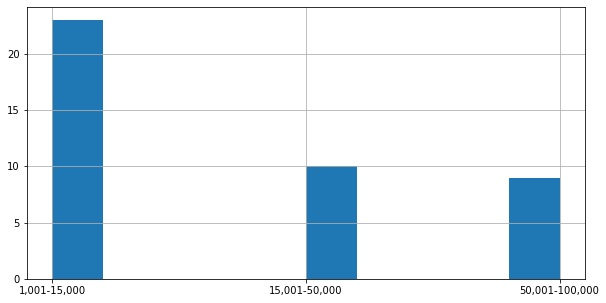

In [249]:
tsla_df.Range.hist(figsize = [10,5]);

In [250]:
jnj_df = pd.DataFrame(df2[df2['Ticker']=="JNJ"])
jnj_df.head()

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Kathy Manning,JNJ,2021-04-30,Sale,1001.0,"1,001-15,000"
Marie Newman,JNJ,2021-04-23,Sale,15001.0,"15,001-50,000"
Marie Newman,JNJ,2021-04-13,Purchase,15001.0,"15,001-50,000"
Mr. Peter Meijer,JNJ,2021-02-16,Sale,15001.0,"15,001-50,000"
Austin Scott,JNJ,2021-01-26,Purchase,15001.0,"15,001-50,000"


In [251]:
jnj_sales = jnj_df[jnj_df['Transaction']=='Sale']
jnj_purchase = jnj_df[jnj_df['Transaction']=='Purchase']
jnj_df = pd.concat([jnj_sales,jnj_purchase])
jnj_df

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Kathy Manning,JNJ,2021-04-30,Sale,1001.0,"1,001-15,000"
Marie Newman,JNJ,2021-04-23,Sale,15001.0,"15,001-50,000"
Mr. Peter Meijer,JNJ,2021-02-16,Sale,15001.0,"15,001-50,000"
Christopher L. Jacobs,JNJ,2021-01-04,Sale,1001.0,"1,001-15,000"
Christopher L. Jacobs,JNJ,2020-09-08,Sale,15001.0,"15,001-50,000"
William R. Timmons Iv,JNJ,2020-06-29,Sale,1001.0,"1,001-15,000"
Marie Newman,JNJ,2021-04-13,Purchase,15001.0,"15,001-50,000"
Austin Scott,JNJ,2021-01-26,Purchase,15001.0,"15,001-50,000"
Kathy Manning,JNJ,2021-01-15,Purchase,1001.0,"1,001-15,000"


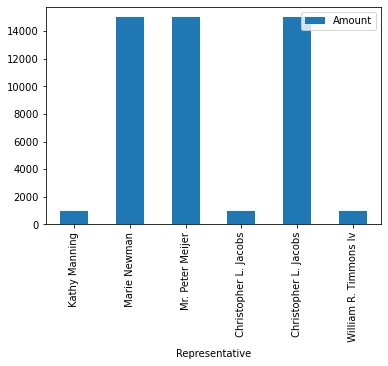

In [252]:
jnj_sales = jnj_df[jnj_df['Transaction']=='Sale'].plot.bar()

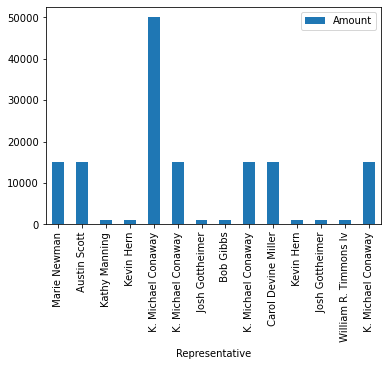

In [253]:
jnj_purchase = jnj_df[jnj_df['Transaction']=='Purchase'].plot.bar()

<AxesSubplot:xlabel='Representative'>

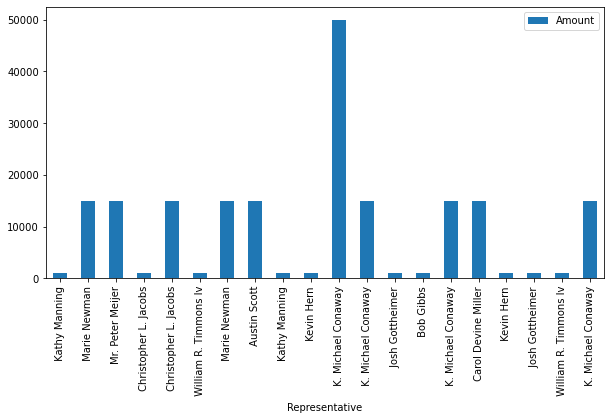

In [254]:
jnj_df.plot.bar(figsize = [10,5])

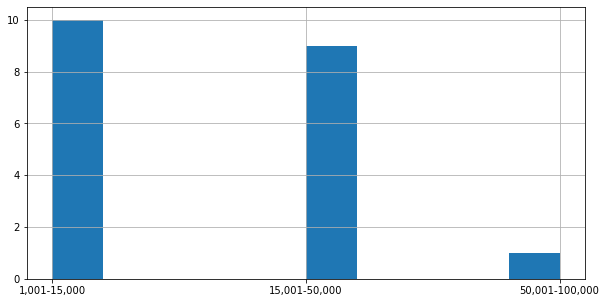

In [255]:
jnj_df.Range.hist(figsize = [10,5]);

In [256]:
spy_df = pd.DataFrame(df2[df2['Ticker']=="SPY"])
spy_df

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Deborah K. Ross,SPY,2021-01-04,Purchase,50001.0,"50,001-100,000"
K. Michael Conaway,SPY,2020-09-08,Sale,15001.0,"15,001-50,000"


<AxesSubplot:xlabel='Representative'>

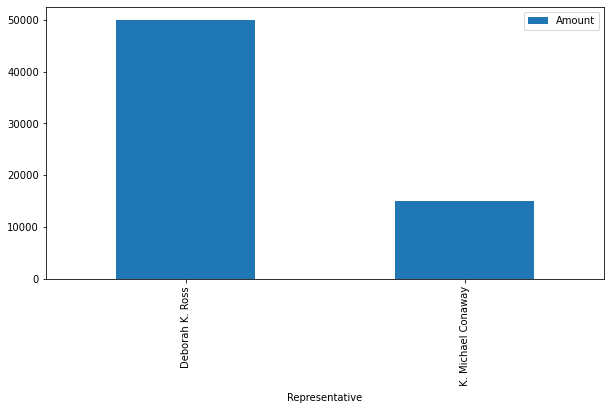

In [257]:
spy_df.plot.bar(figsize = [10,5])

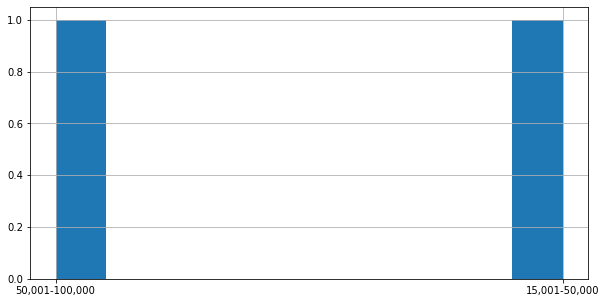

In [258]:
spy_df.Range.hist(figsize = [10,5]);

In [260]:
alpaca = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, api_version="v2")

In [261]:
timeframesios = "1D"

In [262]:
df_portfolio = alpaca.get_barset(['JNJ', "TSLA", "SPY"], timeframe=timeframesios, start="2020-02-08", end="2021-02-08").df

In [263]:
df_portfolio.head()

JNJ                                       \
                             open      high       low   close   volume   
time                                                                     
2021-01-13 00:00:00-05:00  158.23  158.4550  156.7500  157.89  8877839   
2021-01-14 00:00:00-05:00  160.45  161.9500  159.6100  160.60  8489789   
2021-01-15 00:00:00-05:00  160.30  161.4058  159.1058  160.26  7191604   
2021-01-19 00:00:00-05:00  162.00  163.0400  161.1000  162.78  6381117   
2021-01-20 00:00:00-05:00  163.20  164.1400  161.8000  162.41  5360237   

                              SPY                                      TSLA  \
                             open    high     low   close    volume    open   
time                                                                          
2021-01-13 00:00:00-05:00  378.69  380.86  377.85  379.76  38355050  852.76   
2021-01-14 00:00:00-05:00  380.59  381.13  378.10  378.45  41045335  843.39   
2021-01-15 00:00:00-05:00  376.72  377.58  373.70  375.68  78405054  852.00   
2021-01-19 00:00:00-05:00  378.34  379.23  376.75  378.63  42257108  837.80   
2021-01-20 00:00:00-05:00  381.11  384.79  380.69  383.86  53064901  858.74   

                                                             
                             high     low   close    volume  
time                                                         
2021-01-13 00:00:00-05:00  860.47  832.00  854.42  31050197  
2021-01-14 00:00:00-05:00  863.00  838.75  844.21  29982086  
2021-01-15 00:00:00-05:00  859.90  819.10  826.16  36516827  
2021-01-19 00:00:00-05:00  850.00  833.00  844.50  23300603  
2021-01-20 00:00:00-05:00  859.50  837.28  850.65  23470840